#Import Necessary Libraries and Packages

In [32]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, metrics
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#Load Dataset and Split to train and test

In [21]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print dataset shapes
print("Dataset Loaded Successfully!")
print(f"Training set:  x_train = {x_train.shape}, y_train = {y_train.shape}")
print(f"Test set:      x_test  = {x_test.shape}, y_test  = {y_test.shape}")

Dataset Loaded Successfully!
Training set:  x_train = (60000, 28, 28), y_train = (60000,)
Test set:      x_test  = (10000, 28, 28), y_test  = (10000,)


#Show sample images from the MNIST Dataset

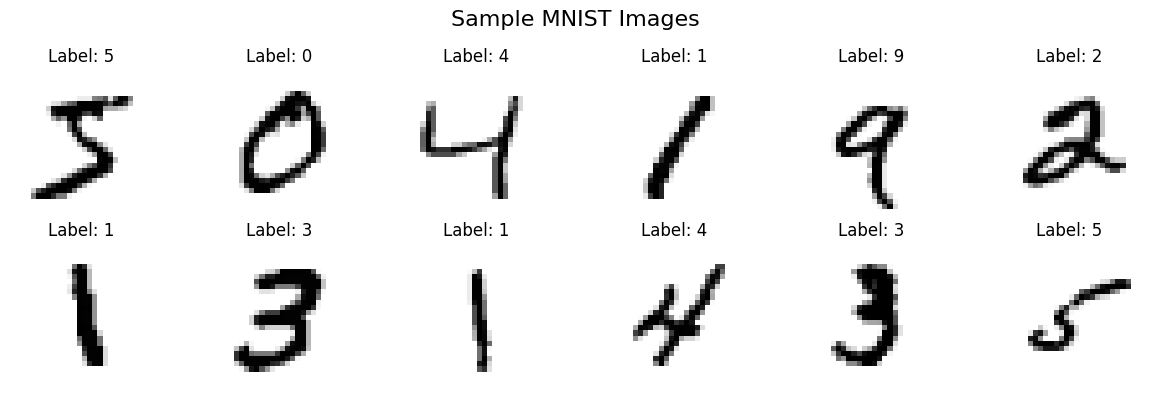

In [23]:
# Display sample images
num_samples = 12  # Number of images to display
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(2, 6, i+1)
    plt.imshow(x_train[i], cmap='gray_r')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.suptitle("Sample MNIST Images", fontsize=16)
plt.tight_layout()
plt.show()

#Normalize image and reshape

Pixel values normalized to range [0, 1]
x_train shape after reshape: (60000, 28, 28, 1)
x_test shape after reshape:  (10000, 28, 28, 1)


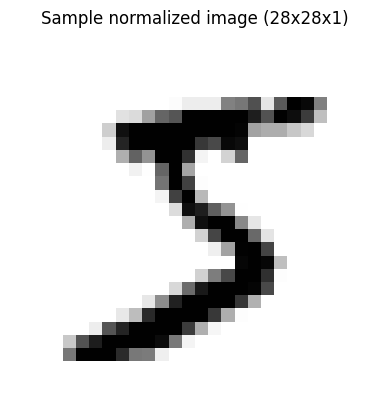

In [25]:
# Normalize image pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
print("Pixel values normalized to range [0, 1]")

# Reshape images to include channel dimension (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)
print(f"x_train shape after reshape: {x_train.shape}")
print(f"x_test shape after reshape:  {x_test.shape}")

# Check a sample image
import matplotlib.pyplot as plt

plt.imshow(x_train[0].reshape(28,28), cmap='gray_r')
plt.title("Sample normalized image (28x28x1)")
plt.axis('off')
plt.show()


#Build Model
This CNN uses two convolutional blocks with BatchNormalization and Dropout to learn features while reducing overfitting. The fully connected layers combine features for classification into 10 digits, giving better accuracy and generalization.

In [27]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),

    # First Conv Block
    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    # Second Conv Block
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,538 (1.61 MB)

 Trainable params: 422,090 (1.61 MB)

 Non-trainable params: 448 (1.75 KB)

#Compile the model
We use the Adam optimizer with a learning rate of 0.001 and sparse_categorical_crossentropy loss. Accuracy is tracked to monitor training performance.

In [31]:
# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=[
        'accuracy',
        metrics.SparseCategoricalAccuracy(name='sparse_acc'),
        metrics.SparseTopKCategoricalAccuracy(k=3, name='top_3_acc') # Top-3 accuracy
    ]
)

#Train Model
The CNN is trained for up to 15 epochs with a batch size of 64. Early stopping and learning rate reduction are used to improve convergence and prevent overfitting.

In [33]:
# Callbacks for better training
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,        # Stop if validation loss doesn't improve for 3 epochs
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,        # Reduce LR by 50% when plateauing
    patience=2,        # Wait 2 epochs before reducing
    verbose=1
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    shuffle=True,          # Shuffle training data each epoch
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 90s 116ms/step - accuracy: 0.8458 - loss: 0.5133 - sparse_acc: 0.8458 - top_3_acc: 0.9473 - val_accuracy: 0.9688 - val_loss: 0.1323 - val_sparse_acc: 0.9688 - val_top_3_acc: 0.9967 - learning_rate: 0.0010
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 112ms/step - accuracy: 0.9646 - loss: 0.1193 - sparse_acc: 0.9646 - top_3_acc: 0.9959 - val_accuracy: 0.9663 - val_loss: 0.1079 - val_sparse_acc: 0.9663 - val_top_3_acc: 0.9967 - learning_rate: 0.0010
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 111ms/step - accuracy: 0.9733 - loss: 0.0895 - sparse_acc: 0.9733 - top_3_acc: 0.9974 - val_accuracy: 0.9628 - val_loss: 0.1284 - val_sparse_acc: 0.9628 - val_top_3_acc: 0.9946 - learning_rate: 0.0010
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 89s 119ms/step - accuracy: 0.9761 - loss: 0.0771 - sparse_acc: 0.9761 - top_3_acc: 0.9980 - val_accuracy: 0.9808 - val_loss: 0.0641 - val_sparse_acc: 0.9808 - val_top_3_acc: 0.9983 - learning_rate: 0.0010
Epoch 5/15
750/750 ━

#Evaluate and save the model
The model is evaluated on the test set to check performance, then saved in Keras format for future use.

In [35]:
# Evaluate the trained model on test data
results = model.evaluate(x_test, y_test, verbose=2)
print(results)
test_loss = results[0]
test_acc  = results[1]
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Save the trained model
model.save('mnist_model.keras')
print("Model saved as 'mnist_model.keras'")


313/313 - 5s - 16ms/step - accuracy: 0.9906 - loss: 0.0272 - sparse_acc: 0.9906 - top_3_acc: 0.9999
[0.027163049206137657, 0.9905999898910522, 0.9905999898910522, 0.9998999834060669]
Test Loss: 0.0272
Test Accuracy: 0.9906
Model saved as 'mnist_model.keras'


#Visualize Predictions
Visualize random test images with model predictions (green = correct, red = incorrect).

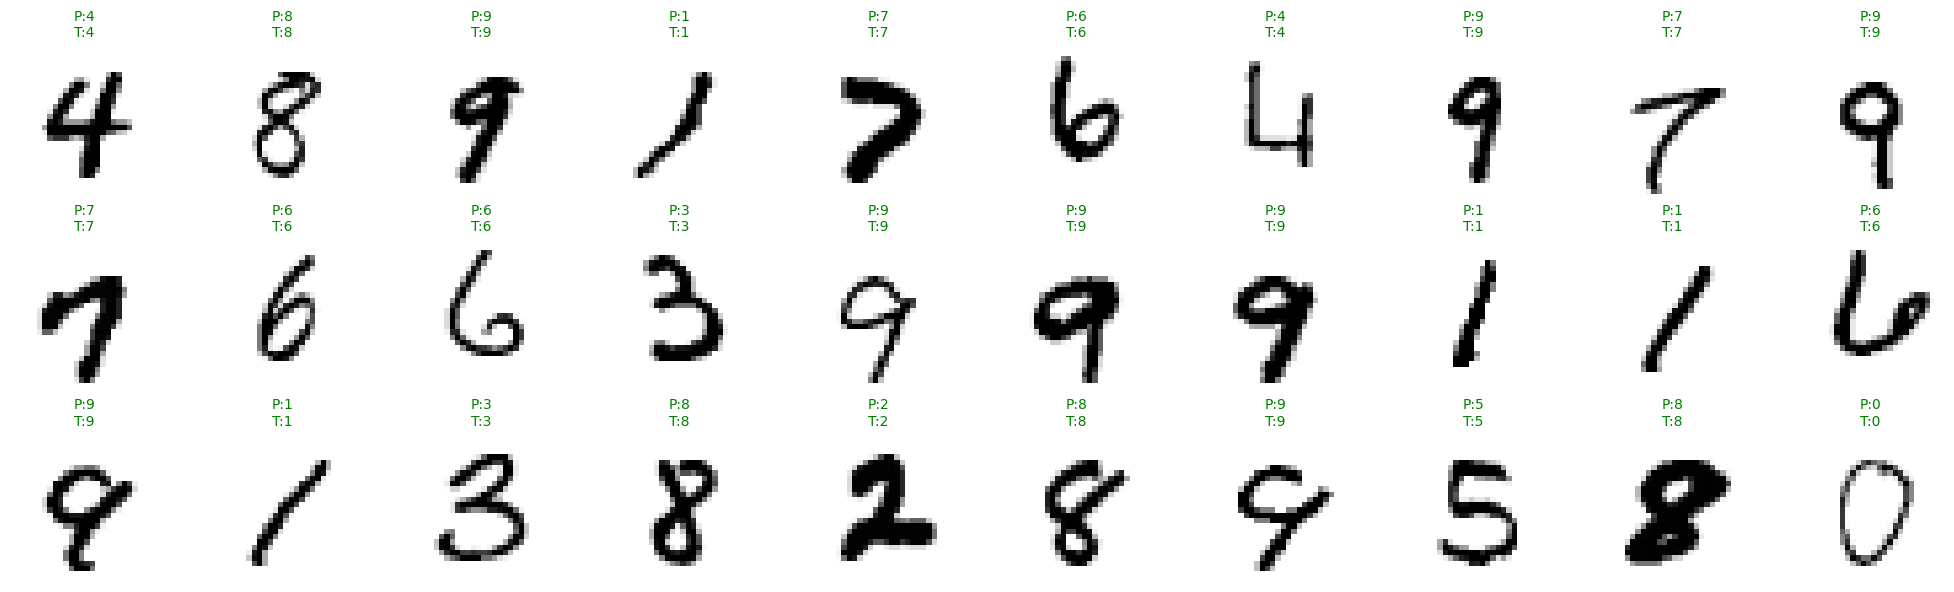

In [36]:
# Visualize random predictions
rows, cols = 3, 10
plt.figure(figsize=(20, 6))

# Pick random indices
indices = np.random.choice(len(x_test), rows * cols, replace=False)

for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    pred_label = np.argmax(model.predict(x_test[idx:idx+1], verbose=0))

    plt.subplot(rows, cols, i+1)
    plt.imshow(img, cmap="gray_r")
    color = "green" if pred_label == true_label else "red"
    plt.title(f"P:{pred_label}\nT:{true_label}", color=color, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()


#Test on single Image
Test the model on a single image and show prediction with confidence (color-coded by correctness).

In [37]:
def test_single(idx):
    #Display a single test image with true label, predicted class, and confidence
    img = x_test[idx]
    true_label = y_test[idx]

    preds = model.predict(img.reshape(1, 28, 28, 1), verbose=0)
    pred_class = np.argmax(preds)
    confidence = np.max(preds)

    plt.figure(figsize=(3,3))
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.axis("off")

    title_color = 'g' if pred_class == true_label else 'r'
    plt.title(f"True: {true_label} | Pred: {pred_class}\nConf: {confidence:.2f}",
              color=title_color)
    plt.show()


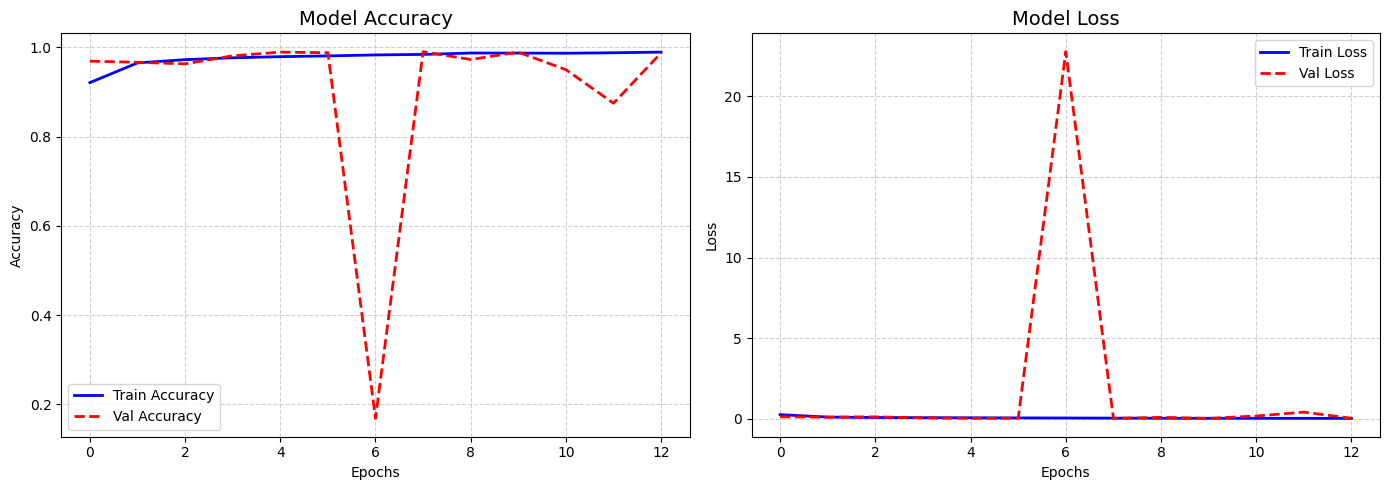

In [38]:
plt.figure(figsize=(14,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'b-', linewidth=2, label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r--', linewidth=2, label='Val Accuracy')
plt.title("Model Accuracy", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], 'b-', linewidth=2, label='Train Loss')
plt.plot(history.history['val_loss'], 'r--', linewidth=2, label='Val Loss')
plt.title("Model Loss", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()


This block reloads the trained model, evaluates its accuracy/loss on the test set, and visualizes misclassifications using a confusion matrix heatmap.

Evaluation Results:
accuracy: 0.9906
loss: 0.0272
sparse_acc: 0.9906
top_3_acc: 0.9999


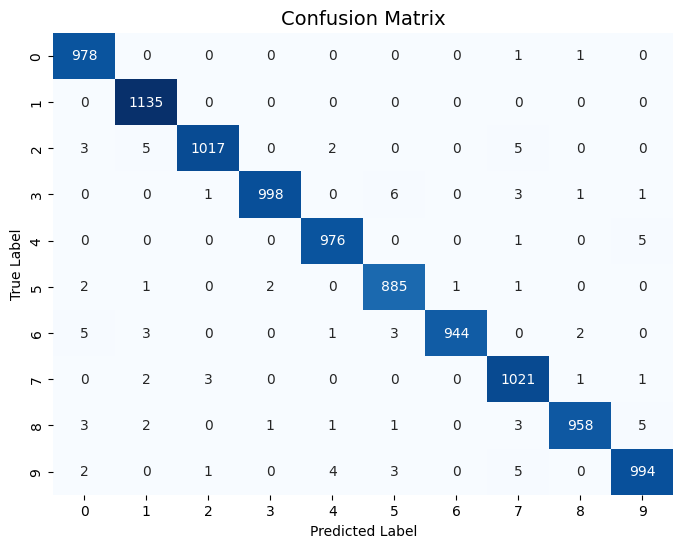

In [40]:
# --- Evaluate saved model & visualize results ---
best_model = keras.models.load_model("mnist_model.keras")

# Evaluate with all metrics
results = best_model.evaluate(x_test, y_test, verbose=0, return_dict=True)

# Print evaluation metrics
print("Evaluation Results:")
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

# Predict and build confusion matrix
y_pred = np.argmax(best_model.predict(x_test, verbose=0), axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
